## Task 3 - Car Price Prediction with Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import squarify

In [3]:
import plotly.express as px

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
dfc=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [7]:
dfc.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
dfc.shape

(205, 26)

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
dfc.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
dfc.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
dfc.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [13]:
dfc.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [14]:
dfc.doornumber.unique()

array(['two', 'four'], dtype=object)

In [15]:
dfc.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [16]:
dfc.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [17]:
dfc.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [18]:
dfc.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [19]:
dfc.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [20]:
dfc.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
dfc.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [22]:
dfc.CarName.nunique()

147

In [23]:
dfcn=dfc.drop(['car_ID','symboling'],axis=1)

In [24]:
dfcn

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Exploratory Data Analysis - Univariate Analysis

### What fueltype is mostly used in cars?

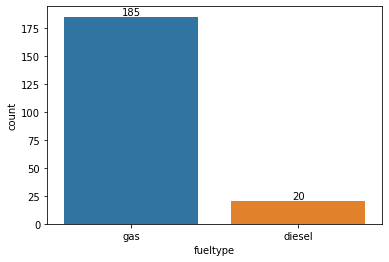

In [25]:
ft=sns.countplot(x="fueltype",data=dfcn)
ft.bar_label(ft.containers[0],label_type='edge')
plt.show()

**Observation**: we can infer from the above graph that the gas is the widely used fuel type in cars.

### What are the aspiration types available in cars?

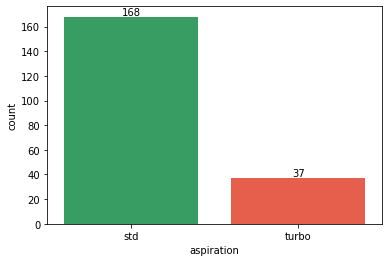

In [26]:
asp=sns.countplot(x="aspiration",data=dfcn,palette=["#27AE60","#FF4C33"])
asp.bar_label(asp.containers[0],label_type='edge')
plt.show()

**Observation**:We can observe from the above coulmn plot that their are two types of aspiration of which the std type is 
the mostly widely available type in cars.

### What are the door type in cars with different fuel types?

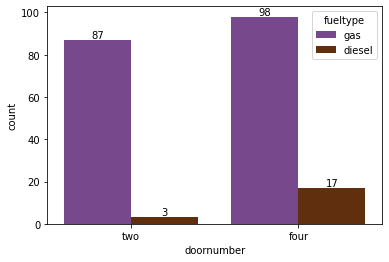

In [27]:
ft=sns.countplot(x="doornumber",data=dfcn,hue='fueltype',palette=["#7D3C98","#6E2C00"])
ft.bar_label(ft.containers[0],label_type='edge')
ft.bar_label(ft.containers[1],label_type='edge')
plt.show()

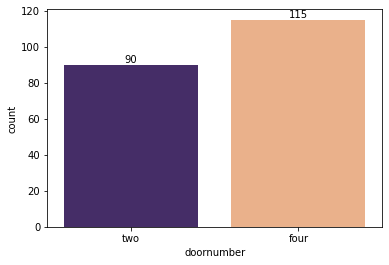

In [28]:
ft=sns.countplot(x="doornumber",data=dfcn,palette=['#432371',"#FAAE7B"])
ft.bar_label(ft.containers[0],label_type='edge')
plt.show()

**Observation**: From the above plot it is observed that ,ost of the cars have four doors and such cars uses gas as its 
fuel.

### What is the most widely adopted carbody types in car?

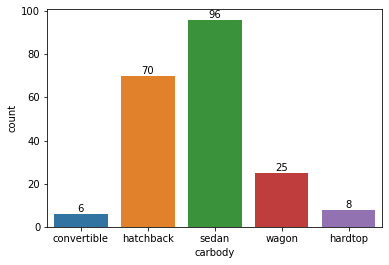

In [29]:
cb=sns.countplot(x="carbody",data=dfcn)
cb.bar_label(cb.containers[0],label_type='edge')
plt.show()

**Observation**: It is found from the above plot that sedan is the most used type of carbody

### What type of drivewheel is mostly employed in cars?

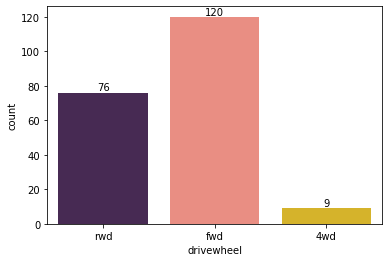

In [30]:
dw=sns.countplot(x="drivewheel",data=dfcn,palette=['#4A235A',"#FA8072","#F1C40F"])
dw.bar_label(dw.containers[0],label_type='edge')
plt.show()

**Observation**:It is observed that the forward wheel drive is most widely adopted in cars which is followed by rearward
drive

### Where are the engines located in most of the cars?

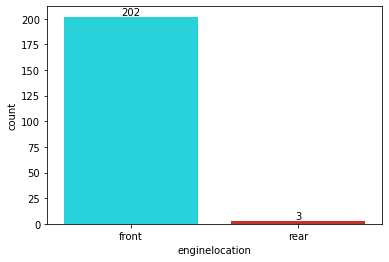

In [31]:
el=sns.countplot(x="enginelocation",data=dfcn,palette=['#0CEDF8',"#E3190C"])
el.bar_label(el.containers[0],label_type='edge')
plt.show()

**Observation**: In most of the cars(202) the engine is located in the frontside of the car.

### Which type of engine is mostly employed in the car?

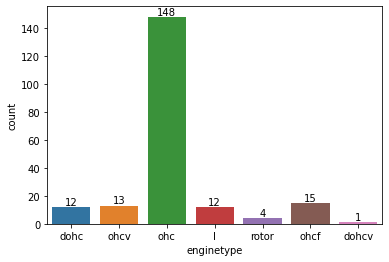

In [32]:
et=sns.countplot(x="enginetype",data=dfcn)
et.bar_label(et.containers[0],label_type='edge')
plt.show()

**Observation**: It is observed that the ohc (over head camshaft engine) is the most widely adopted engine type in cars.

### How many cylinders are mostly employed in cars?

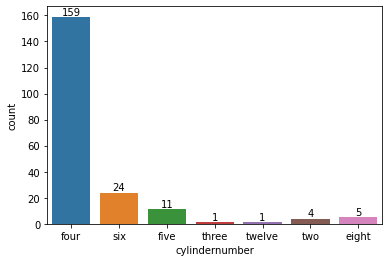

In [33]:
cn=sns.countplot(x="cylindernumber",data=dfcn)
cn.bar_label(cn.containers[0],label_type='edge')
plt.show()

**Observation**: The four cylinder engine are the most favorable engine type employed in the car

In [34]:
What type of fuel system were widely adopted in the cars?

Object `cars` not found.


In [ ]:
What type of fuel system were widely adopted in the cars

In [35]:
What type of fuel system were widely adopted in the cars

SyntaxError: invalid syntax (4276055057.py, line 1)

In [ ]:
What type of fuel system were widely adopted in the cars

In [ ]:
What type of fuel system were widely adopted in the cars

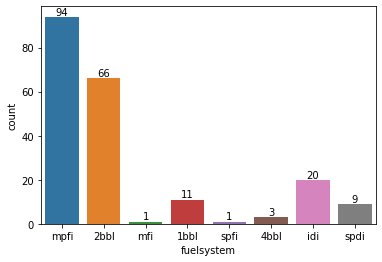

In [36]:
fs=sns.countplot(x="fuelsystem",data=dfcn)
fs.bar_label(fs.containers[0],label_type='edge')
plt.show()

**observation** mpfi is the most widely used fuel sytem in car.

## Bivariate Analysis

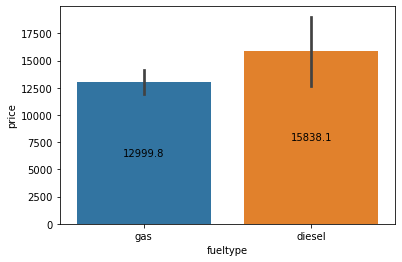

In [37]:
ftp=sns.barplot(x=dfcn['fueltype'],y=dfcn['price'])
ftp.bar_label(ftp.containers[0],label_type='center')
plt.show()

**Observation** It is observed that the price of diesel car is higher than the gas fueled car.

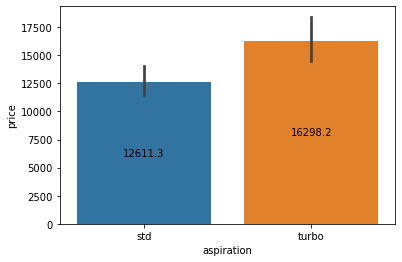

In [38]:
asp=sns.barplot(x=dfcn['aspiration'],y=dfcn['price'])
asp.bar_label(asp.containers[0],label_type='center')
plt.show()

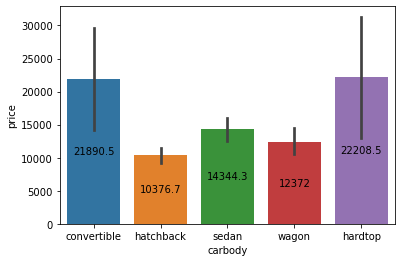

In [39]:
cbp=sns.barplot(x=dfcn['carbody'],y=dfcn['price'])
cbp.bar_label(cbp.containers[0],label_type='center')
plt.show()

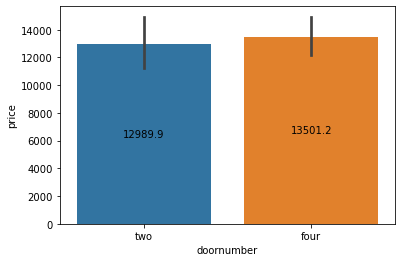

In [40]:
asp=sns.barplot(x=dfcn['doornumber'],y=dfcn['price'])
asp.bar_label(asp.containers[0],label_type='center')
plt.show()

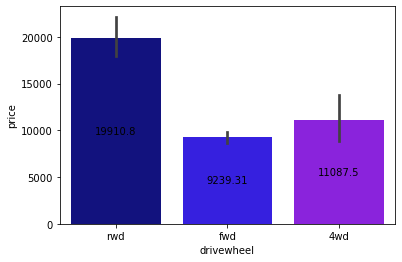

In [41]:
sns.set_palette('gnuplot2')
dw=sns.barplot(x=dfcn['drivewheel'],y=dfcn['price'])
dw.bar_label(dw.containers[0],label_type='center')
plt.show()

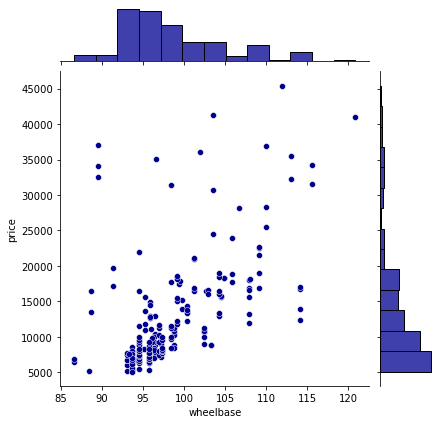

In [42]:
sns.set_palette('gnuplot2')
sns.jointplot(x=dfcn['wheelbase'],y=dfcn['price'])
plt.show()

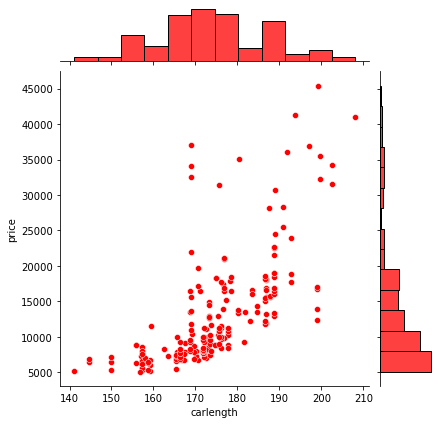

In [43]:
sns.jointplot(x=dfcn['carlength'],y=dfcn['price'],color='red')
plt.show()

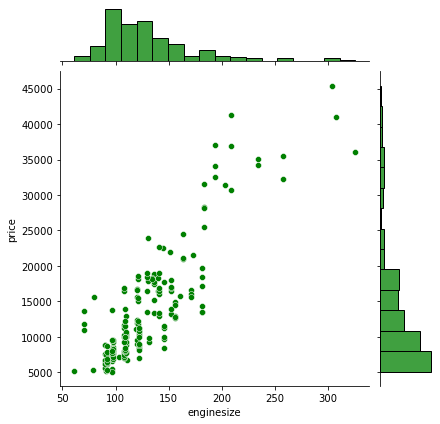

In [44]:
sns.jointplot(x=dfcn['enginesize'],y=dfcn['price'],color='green')
plt.show()

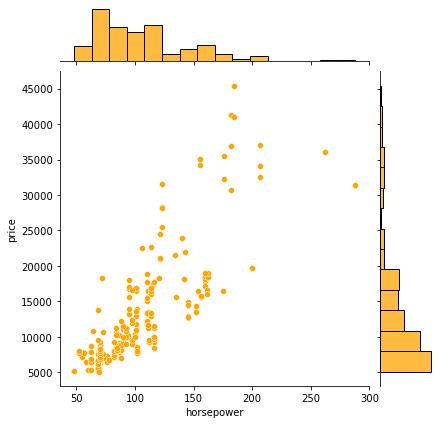

In [45]:
sns.jointplot(x=dfcn['horsepower'],y=dfcn['price'],color='orange')
plt.show()

In [46]:
ntm=dfcn.groupby('enginetype')[['price']].mean().sort_values(by='price',ascending=False)

In [47]:
ntm

,price
enginetype,
dohcv,31400.500000
ohcv,25098.384615
dohc,18116.416667
l,14627.583333
ohcf,13738.600000
rotor,13020.000000
ohc,11574.048426


In [48]:
et=dfcn.groupby('enginetype')[['price']].mean().index.get_level_values(0).tolist()

In [49]:
et

['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']

In [50]:
pt=dfcn.groupby('enginetype')[['price']].mean().reset_index().price.values.tolist()

In [51]:
pt

[18116.416666666668,
 31400.5,
 14627.583333333334,
 11574.048425675675,
 13738.6,
 25098.384615384617,
 13020.0]

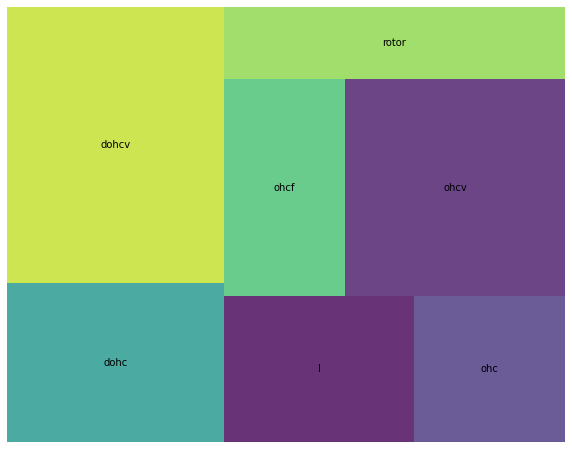

In [52]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=pt,label=et,alpha=.8)
plt.axis('off')
plt.show()

In [53]:
dfcn

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [54]:
dfcn=dfcn.drop(['CarName'],axis=1)

In [55]:
dfcn

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
def catepicker(df):
    cat=[]
    for i in df.columns:
        if df.dtypes[i]=='object':
            cat.append(i)
    return cat

In [57]:
catepicker(dfcn)

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [58]:
dfcn.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [59]:
categories=catepicker(dfcn)

In [60]:
categories

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [61]:
def numpicker(df):
    numcat=[]
    for i in df.columns:
        if i not in categories:
            numcat.append(i)
    return numcat

In [62]:
numercolumns=numpicker(dfcn)

In [63]:
numercolumns

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [66]:
#dfnew.head()

In [68]:
laben=LabelEncoder()
for i in categories:
    dfcn[i]=laben.fit_transform(dfcn[i])
dfcn.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
dfcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int32  
 1   aspiration        205 non-null    int32  
 2   doornumber        205 non-null    int32  
 3   carbody           205 non-null    int32  
 4   drivewheel        205 non-null    int32  
 5   enginelocation    205 non-null    int32  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

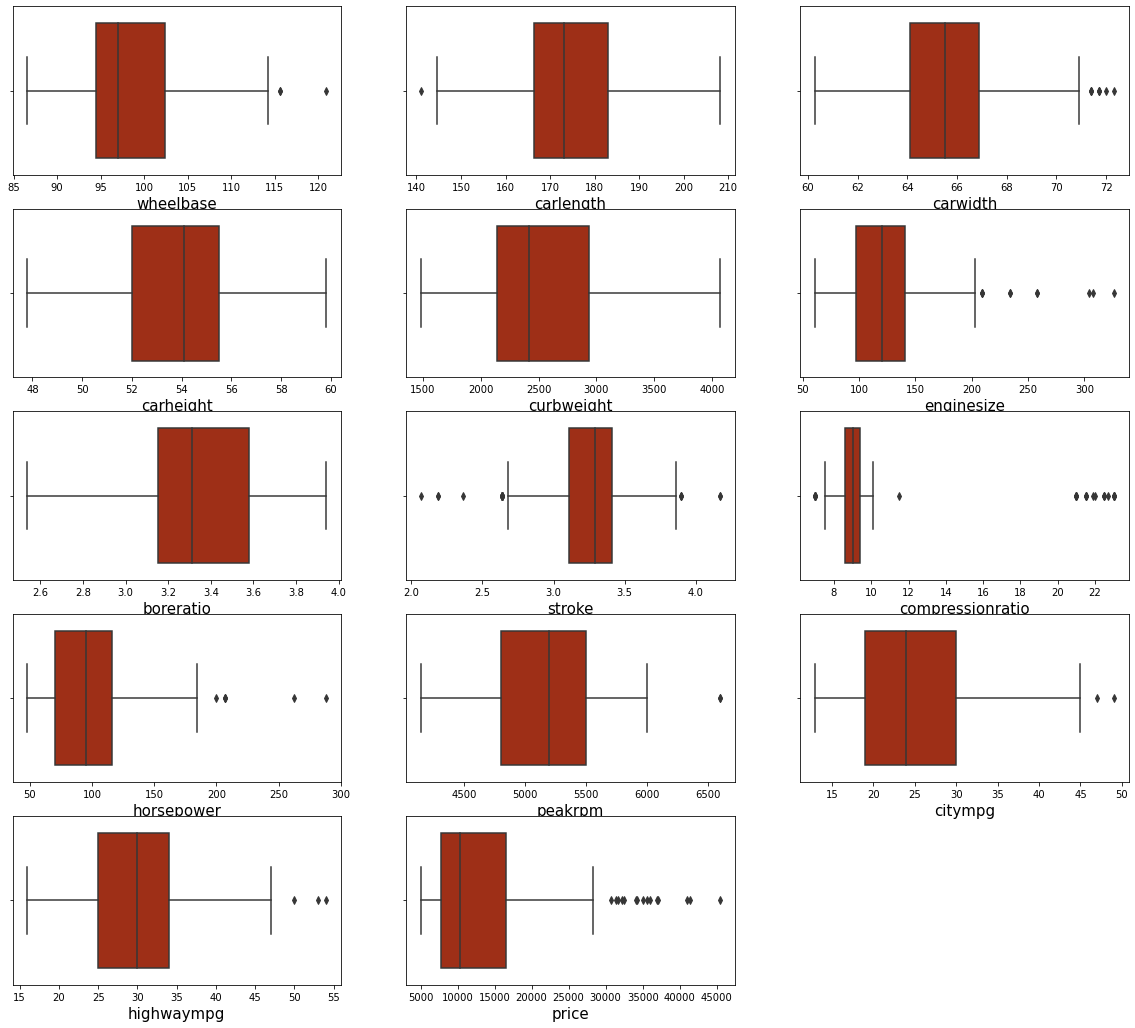

In [72]:
plt.figure(figsize=(20,18),facecolor='white')
num=1
for i in numercolumns:
    if num <=14:
        ax=plt.subplot(5,3,num)
        sns.boxplot(dfcn[i],palette='gnuplot')
        plt.xlabel(i,fontsize=15)
    num += 1
plt.show()

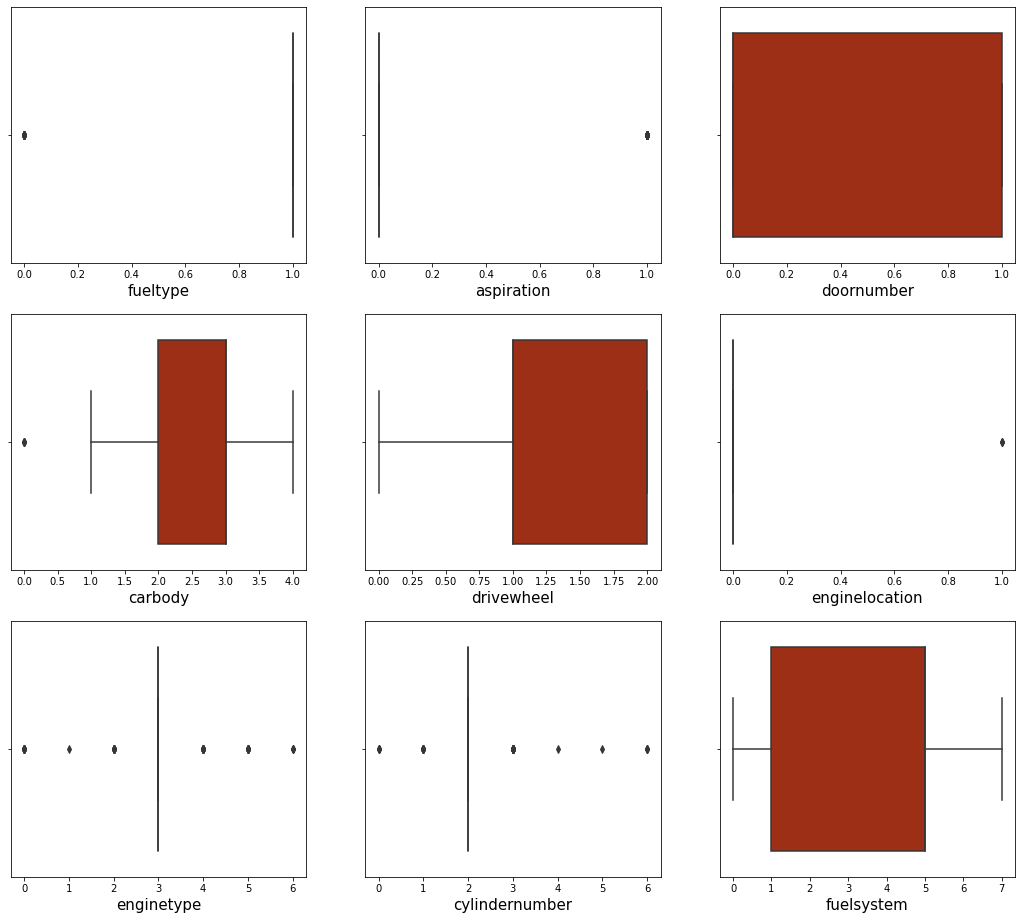

In [74]:
plt.figure(figsize=(18,16),facecolor='white')
numm=1
for i in categories:
    if numm <= 9:
        ax=plt.subplot(3,3,numm)
        sns.boxplot(dfcn[i],palette='gnuplot')
        plt.xlabel(i,fontsize=15)
    numm += 1
plt.show()

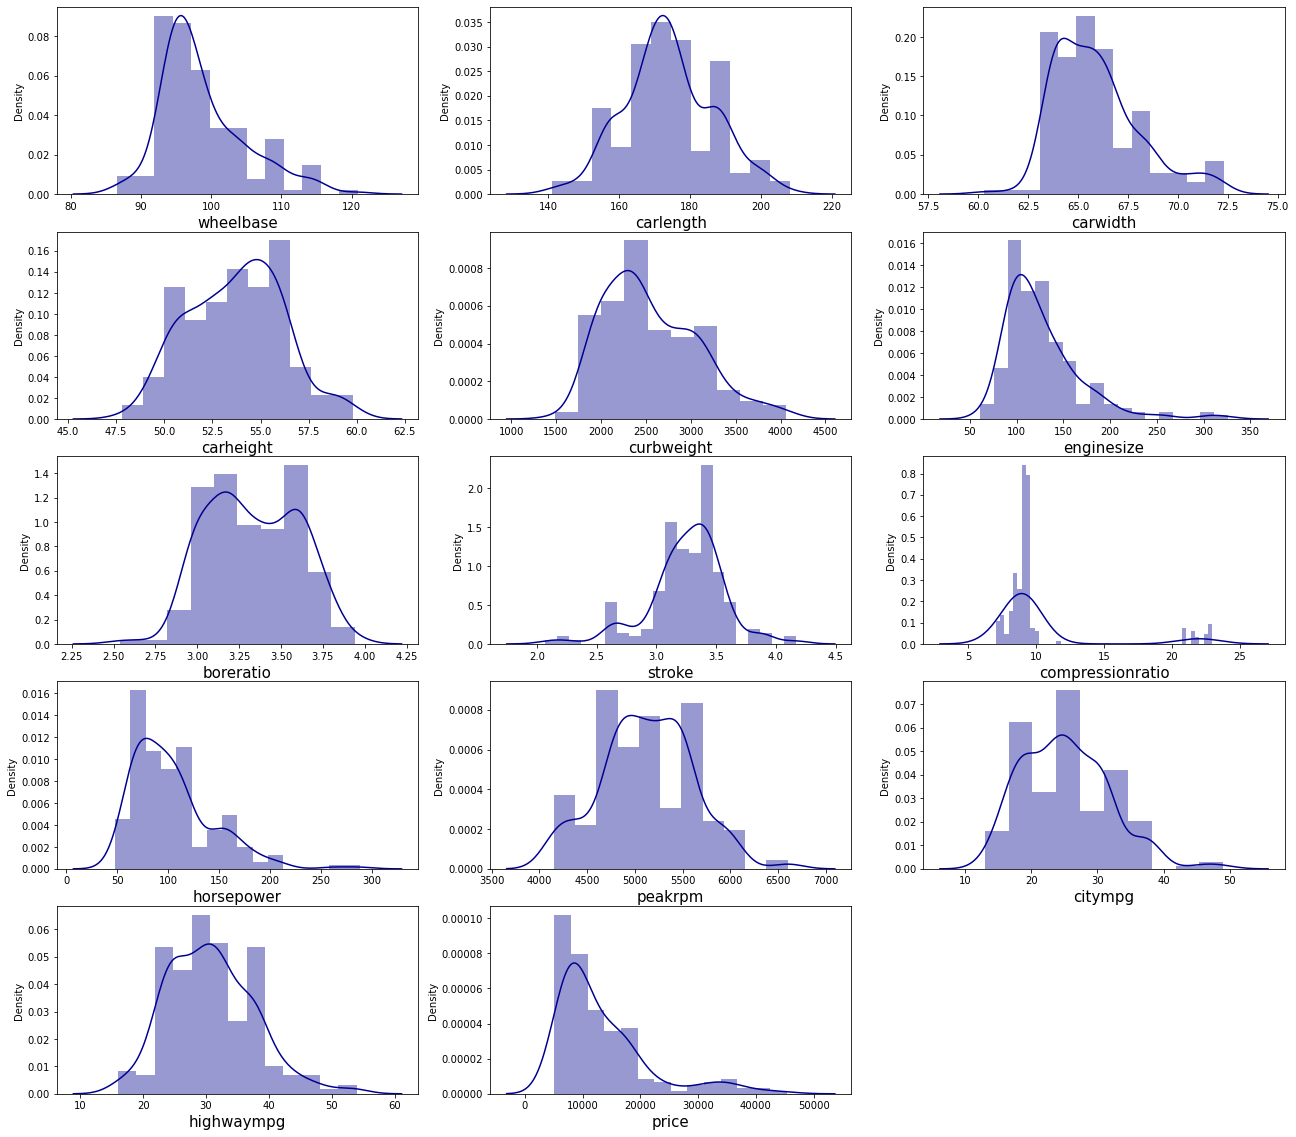

In [75]:
plt.figure(figsize=(22,20),facecolor='white')
num=1
for i in numercolumns:
    if num <= 14:
        ax=plt.subplot(5,3,num)
        sns.distplot(x=dfcn[i])
        plt.xlabel(i,fontsize=15)
    num += 1
plt.show()

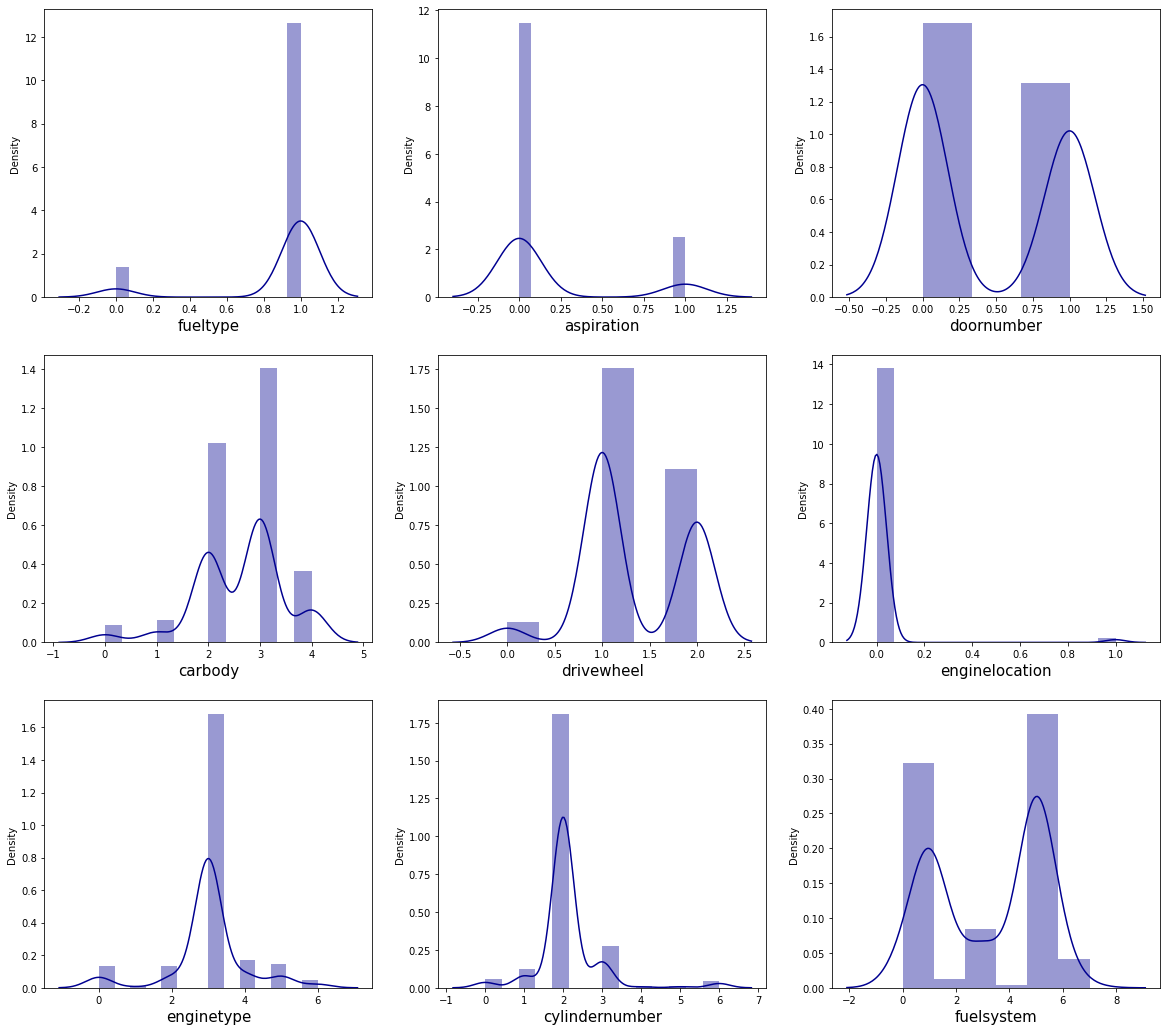

In [77]:
plt.figure(figsize=(20,18),facecolor='white')
numn=1
for i in categories:
    if numn <= 9:
        ax=plt.subplot(3,3,numn)
        sns.distplot(x=dfcn[i])
        plt.xlabel(i,fontsize=15)
    numn += 1
plt.show()

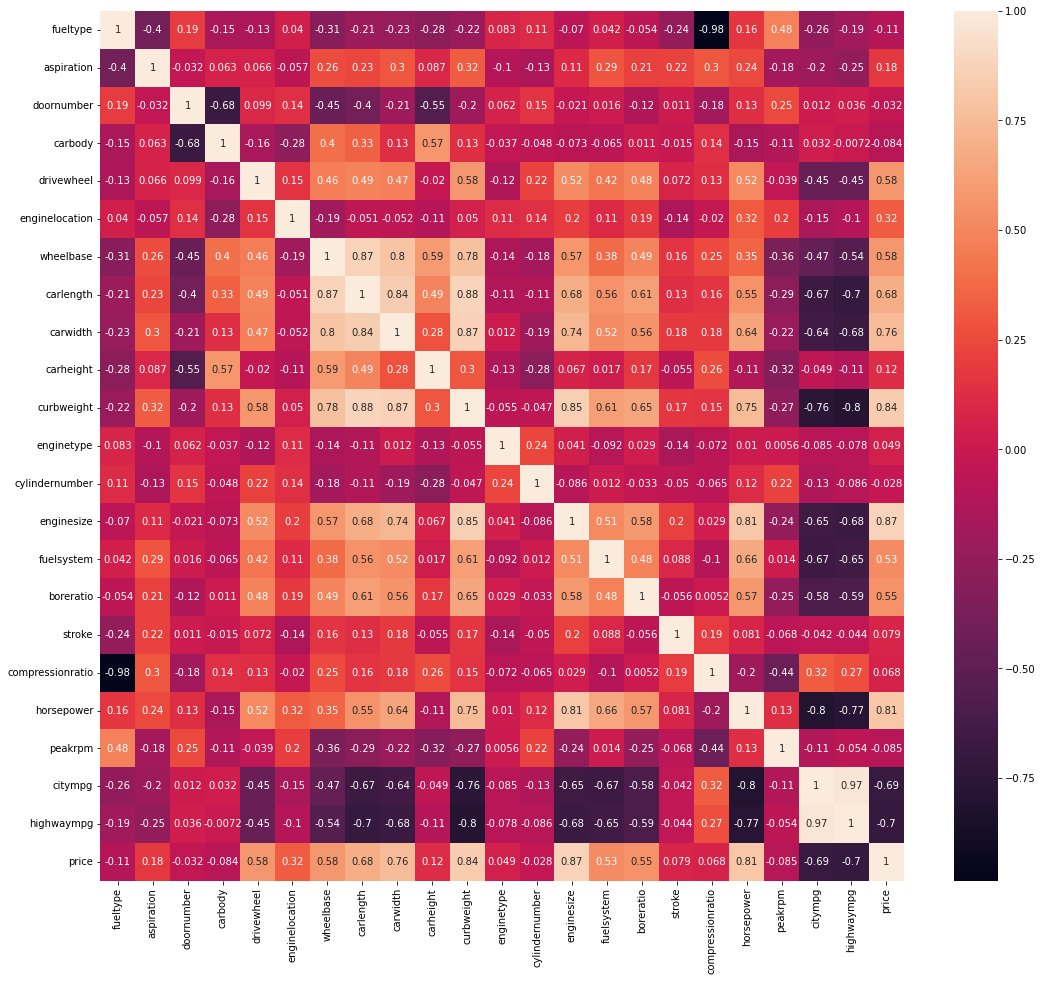

In [79]:
plt.figure(figsize=(18,16))
new=dfcn.corr()
sns.heatmap(new,annot=True)
plt.show()

### ML Model Implementation

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X=dfcn.drop(['price'],axis=1)
y=dfcn['price']

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dcr=DecisionTreeRegressor()

In [111]:
dcr.fit(X_train,y_train)

DecisionTreeRegressor()

In [114]:
dtp=dcr.predict(X_test)

In [115]:
print(r2_score(y_test,dtp))

0.9001900652151075


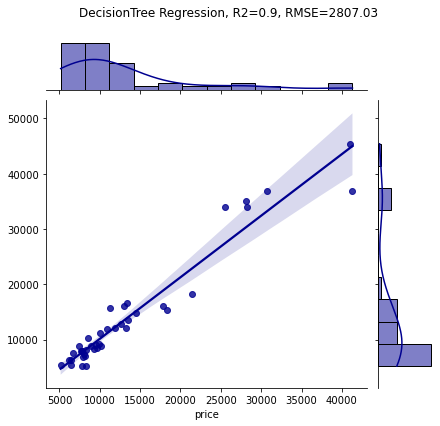

In [122]:
figdt=sns.jointplot(x=y_test,y=dtp,kind='reg')
figdt.fig.suptitle(f"DecisionTree Regression, R2={round(r2_score(y_test,dtp),2)}, RMSE={round(np.sqrt(mean_squared_error(y_test,dtp)),2)}")
figdt.fig.subplots_adjust(top=0.9)
plt.show()

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rfrr=RandomForestRegressor()
rfrr.fit(X_train,y_train)

RandomForestRegressor()

In [120]:
rfrc=rfrr.predict(X_test)

In [121]:
print(r2_score(y_test,rfrc))

0.956705575523433


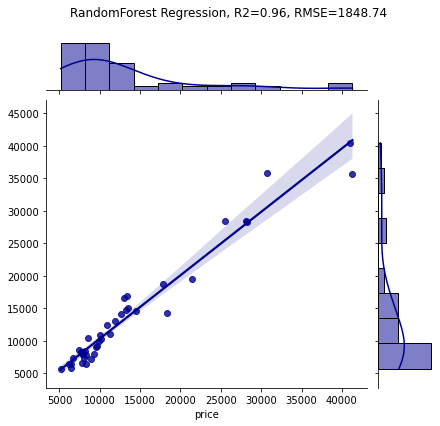

In [136]:
figrfr=sns.jointplot(x=y_test,y=rfrc,kind='reg')
figrfr.fig.suptitle(f"RandomForest Regression, R2={round(r2_score(y_test,rfrc),2)}, RMSE={round(np.sqrt(mean_squared_error(y_test,rfrc)),2)}")
figrfr.fig.subplots_adjust(top=0.9)
plt.show()

In [84]:
import xgboost as xg

In [85]:
xgr=xg.XGBRegressor()

In [86]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [87]:
preed=xgr.predict(X_test)

In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [94]:
print(r2_score(y_test,preed))

0.9313058242853689


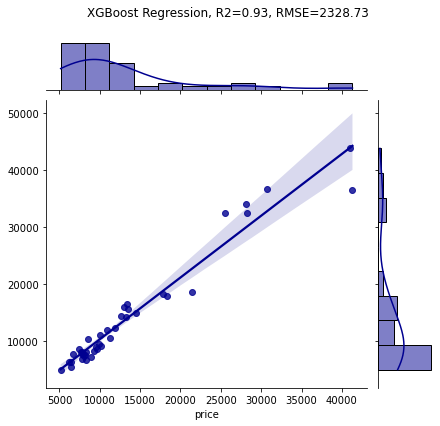

In [137]:
figxg=sns.jointplot(x=y_test,y=preed,kind='reg')
figxg.fig.suptitle(f"XGBoost Regression, R2={round(r2_score(y_test,preed),2)}, RMSE={round(np.sqrt(mean_squared_error(y_test,preed)),2)}")
figxg.fig.subplots_adjust(top=0.9)
plt.show()

In [125]:
from sklearn.ensemble import AdaBoostRegressor

In [126]:
abrc=AdaBoostRegressor()
abrc.fit(X_train,y_train)

AdaBoostRegressor()

In [127]:
abrp=abrc.predict(X_test)

In [128]:
print(r2_score(y_test,abrp))

0.9135787831311908


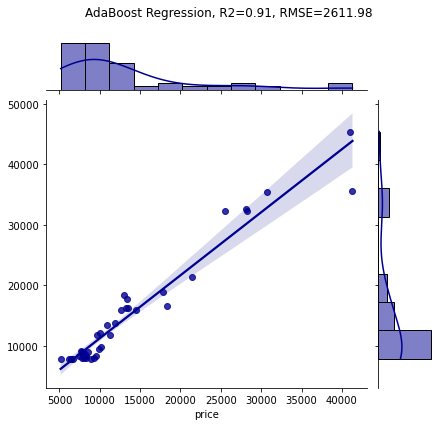

In [138]:
figab=sns.jointplot(x=y_test,y=abrp,kind='reg')
figab.fig.suptitle(f"AdaBoost Regression, R2={round(r2_score(y_test,abrp),2)}, RMSE={round(np.sqrt(mean_squared_error(y_test,abrp)),2)}")
figab.fig.subplots_adjust(top=0.9)
plt.show()

In [130]:
from sklearn.ensemble import  GradientBoostingRegressor

In [131]:
gbrc=GradientBoostingRegressor()
gbrc.fit(X_train,y_train)

GradientBoostingRegressor()

In [134]:
gbrp=gbrc.predict(X_test)

In [135]:
print(r2_score(y_test,gbrp))

0.9269329395966581


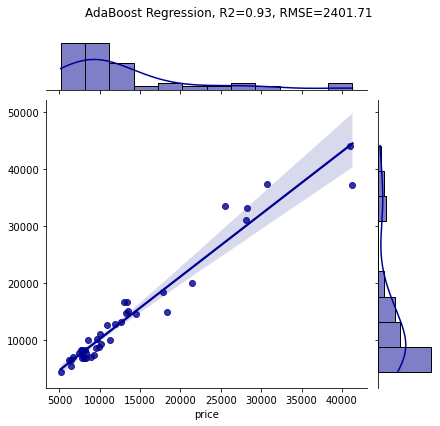

In [140]:
figgb=sns.jointplot(x=y_test,y=gbrp,kind='reg')
figgb.fig.suptitle(f"AdaBoost Regression, R2={round(r2_score(y_test,gbrp),2)}, RMSE={round(np.sqrt(mean_squared_error(y_test,gbrp)),2)}")
figgb.fig.subplots_adjust(top=0.9)
plt.show()

**Final ML Model:** From the above analysis and comparison of different ML models for its performance in this analysis, it is 
concluded that the Random Forest ML model delived higher R2 value and lower RMSE. Hence the Random Forest ML model were 
finalized for this study

### Predictions with Final Random Forest Model

In [141]:
import joblib
joblib.dump(rfrr,'Car_sell_price.pkl')

['Car_sell_price.pkl']

In [142]:
modell=joblib.load('Car_sell_price.pkl')

In [143]:
predictionss=modell.predict(X_test)

In [144]:
predictionss

array([35842.575     , 18708.93      ,  8962.53      , 12947.57333333,
       28257.04857143,  6475.46      ,  7899.25      ,  7998.32      ,
       10248.82      ,  8193.735     , 14775.48333333,  7844.02      ,
       14323.09      , 10927.34      , 40450.36      ,  6466.18      ,
        5690.655     , 14148.42      ,  8363.59      ,  9984.88      ,
       10429.77      , 15082.6       ,  6464.7       ,  5806.515     ,
        7293.97      , 35677.28      ,  9116.24      , 16913.9       ,
        7255.49      , 16498.39      , 28447.36857143,  6422.91      ,
        8056.14333333, 19522.85      ,  8175.41666667, 28470.44857143,
       10972.105     , 12375.65      ,  7179.725     , 14606.26      ,
        8548.89333333])

In [145]:
pd.DataFrame([modell.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Predicted,35842.575,18708.930,8962.53,12947.573333,28257.048571,6475.46,7899.25,7998.32,10248.82,8193.735,...,6422.91,8056.143333,19522.85,8175.416667,28470.448571,10972.105,12375.65,7179.725,14606.26,8548.893333
Actual,30760.000,17859.167,9549.00,11850.000000,28248.000000,7799.00,7788.00,9258.00,10198.00,7775.000,...,6229.00,7898.000000,21485.00,7689.000000,28176.000000,11259.000,10945.00,8916.500,14489.00,7463.000000
